### Библиотеки

In [5]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import numpy as np 
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
color = sns.color_palette()
%matplotlib inline 

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 8

### Знакомство с данными

In [3]:
train = pd.read_csv('../input/train.csv')
train.head(1)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
0,-6.130724,7.429628,3.651437,-1.950971,-3.384415,1.095934,-3.077774,-2.619091,5.128201,1.228476,...,0.392978,4.920467,16.61046,-2.430804,-1.405573,18.610209,-4.140715,6.027816,-20.288145,0


In [6]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
count,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,...,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000
mean,-0.008188,0.046069,0.084133,-0.034631,-0.014021,1.537025,0.115259,-0.086073,0.029376,0.241310,...,-0.097963,0.025496,0.029191,-0.009160,0.003571,0.158798,0.064066,-0.205739,-0.122300,0.287233
std,3.057552,6.858400,2.695550,2.765791,7.261945,0.441206,2.762552,2.742284,2.748676,5.454805,...,2.911122,6.131952,7.884183,2.725234,2.752172,5.803769,2.779181,6.522376,6.802771,0.452503
min,-11.852801,-27.841715,-10.613443,-10.931017,-28.752811,1.000020,-10.311434,-10.075589,-10.141371,-19.277277,...,-10.638970,-28.953492,-33.201209,-11.850828,-9.478779,-20.325866,-9.926252,-28.539398,-28.483072,0.000000
25%,-2.062561,-4.317894,-1.740497,-1.896934,-4.743647,1.189318,-1.703177,-1.950722,-1.846900,-3.445588,...,-2.078737,-3.974946,-5.151041,-1.844369,-1.902487,-3.784460,-1.790703,-4.666848,-4.573261,0.000000
50%,-0.017501,-0.053759,0.084710,-0.075840,-0.091840,1.414150,0.143693,-0.063503,0.063927,0.261190,...,-0.088714,-0.008010,-0.050073,-0.007633,-0.007796,0.166533,0.027659,-0.234126,-0.093245,0.000000
75%,1.991994,4.245097,1.921483,1.777565,4.788682,1.759918,1.964735,1.786275,1.892030,3.906689,...,1.921656,4.007312,5.322672,1.840979,1.833849,4.026855,1.931042,4.296710,4.339118,1.000000
max,12.902967,34.619762,9.492417,11.881847,26.337084,2.717640,10.887146,10.071861,10.213687,21.919386,...,11.498217,26.914131,36.333892,9.047867,11.195738,22.448674,9.925644,27.139111,26.071364,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6963 non-null   float64
 1   1       6963 non-null   float64
 2   2       6963 non-null   float64
 3   3       6963 non-null   float64
 4   4       6963 non-null   float64
 5   5       6963 non-null   float64
 6   6       6963 non-null   float64
 7   7       6963 non-null   float64
 8   8       6963 non-null   float64
 9   9       6963 non-null   float64
 10  10      6963 non-null   float64
 11  11      6963 non-null   float64
 12  12      6963 non-null   float64
 13  13      6963 non-null   float64
 14  14      6963 non-null   float64
 15  15      6963 non-null   float64
 16  16      6963 non-null   float64
 17  17      6963 non-null   float64
 18  18      6963 non-null   float64
 19  19      6963 non-null   float64
 20  20      6963 non-null   float64
 21  21      6963 non-null   float64
 22  

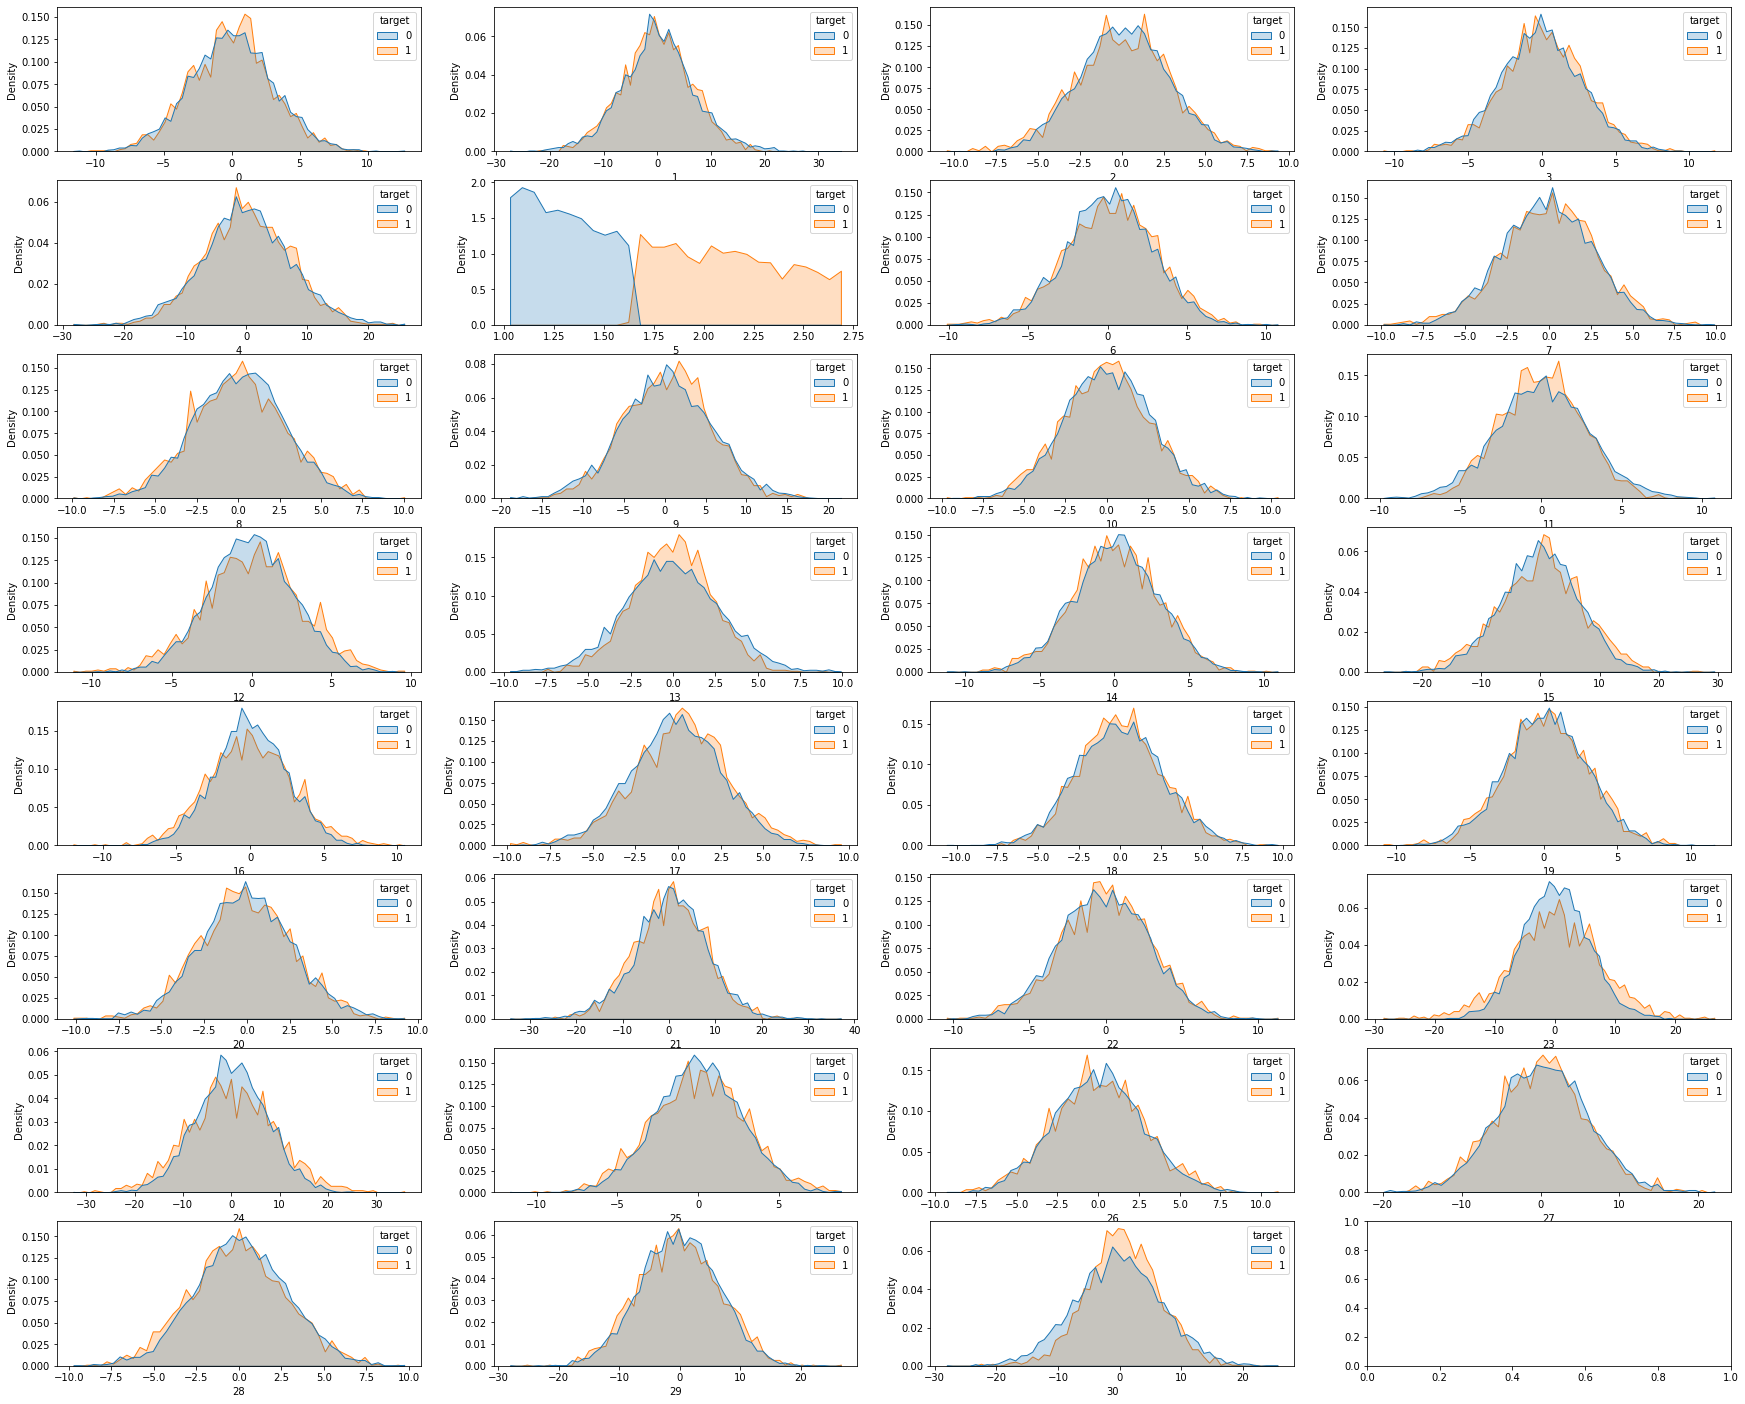

In [8]:
f, axs = plt.subplots(8, 4)
f.set_size_inches(30, 25)

for i in range(8):
    for j in range(4):
        idx = i * 4 + j
        if idx <= 30:
            sns.histplot(
                data=train,
                x=str(idx),
                ax=axs[i][j],
                label=f"{idx}",
                hue="target",
                stat="density",
                element="poly",
                multiple="layer",
                common_bins="True",
                common_norm=False,
            )

plt.show()

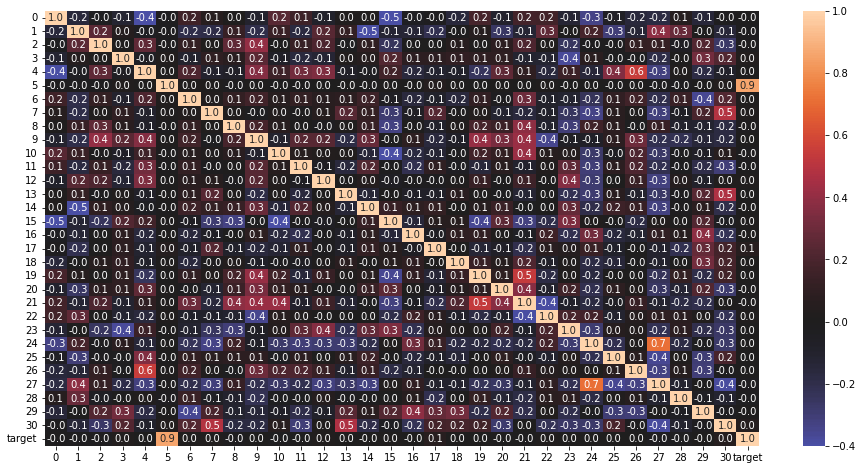

In [9]:
sns.heatmap(train.corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0)

plt.show()

In [10]:
test = pd.read_csv('../input/test.csv')
test.head(1)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-4.768975,-1.744984,0.069141,-6.560182,13.267557,1.768138,1.711161,-5.289421,2.682271,-2.763065,...,4.198756,-0.625212,11.05337,1.535982,0.410761,-3.754269,8.633258,0.224213,-2.310344,-20.48268


In [11]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,...,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000
mean,0.015145,-0.020597,0.067258,-0.043136,-0.131702,1.704046,0.085163,-0.036655,0.016530,0.120174,...,0.200395,-0.022683,0.040625,-0.036537,0.008034,0.008786,0.050143,-0.135347,-0.109935,0.158666
std,3.075687,6.726325,2.695648,2.724650,7.458724,0.485110,2.802093,2.837274,2.767292,5.471667,...,7.777682,2.913653,6.569946,8.296168,2.793608,2.799258,5.715594,2.784791,6.524374,6.466419
min,-10.751347,-25.064691,-10.864731,-9.072677,-28.765004,1.000133,-9.748844,-10.728023,-11.077209,-22.657662,...,-31.982892,-9.998571,-27.444193,-27.156742,-9.619792,-8.805270,-19.133216,-9.673340,-23.701751,-21.738288
25%,-2.058661,-4.408143,-1.762262,-1.845699,-5.086969,1.275642,-1.841325,-1.982955,-1.822017,-3.443043,...,-4.814101,-1.983966,-4.175535,-5.519472,-1.879208,-1.908874,-3.740910,-1.985189,-4.425777,-4.039966
50%,0.049112,-0.001418,0.056225,-0.071386,-0.203640,1.619739,0.056721,-0.009575,-0.056668,0.204735,...,0.240013,-0.005157,-0.036412,-0.009390,-0.046520,-0.018940,0.059998,-0.134163,0.033743,0.134343
75%,2.118363,4.447761,1.851108,1.811830,4.829651,2.085166,1.966252,1.836777,1.856670,3.743951,...,5.240292,1.919159,4.245202,5.490575,1.963910,1.954291,3.935047,1.727993,4.440524,4.353940
max,10.903907,26.663139,9.767311,10.361460,28.600930,2.715644,10.325825,9.462251,11.742691,18.227720,...,32.652753,10.193316,25.573592,32.189738,8.979981,9.569150,23.670857,9.541021,23.439818,25.232459


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3920 non-null   float64
 1   1       3920 non-null   float64
 2   2       3920 non-null   float64
 3   3       3920 non-null   float64
 4   4       3920 non-null   float64
 5   5       3920 non-null   float64
 6   6       3920 non-null   float64
 7   7       3920 non-null   float64
 8   8       3920 non-null   float64
 9   9       3920 non-null   float64
 10  10      3920 non-null   float64
 11  11      3920 non-null   float64
 12  12      3920 non-null   float64
 13  13      3920 non-null   float64
 14  14      3920 non-null   float64
 15  15      3920 non-null   float64
 16  16      3920 non-null   float64
 17  17      3920 non-null   float64
 18  18      3920 non-null   float64
 19  19      3920 non-null   float64
 20  20      3920 non-null   float64
 21  21      3920 non-null   float64
 22  

In [19]:
test['target'] = pd.read_csv('../input/sample_submission_perceptron.csv').target

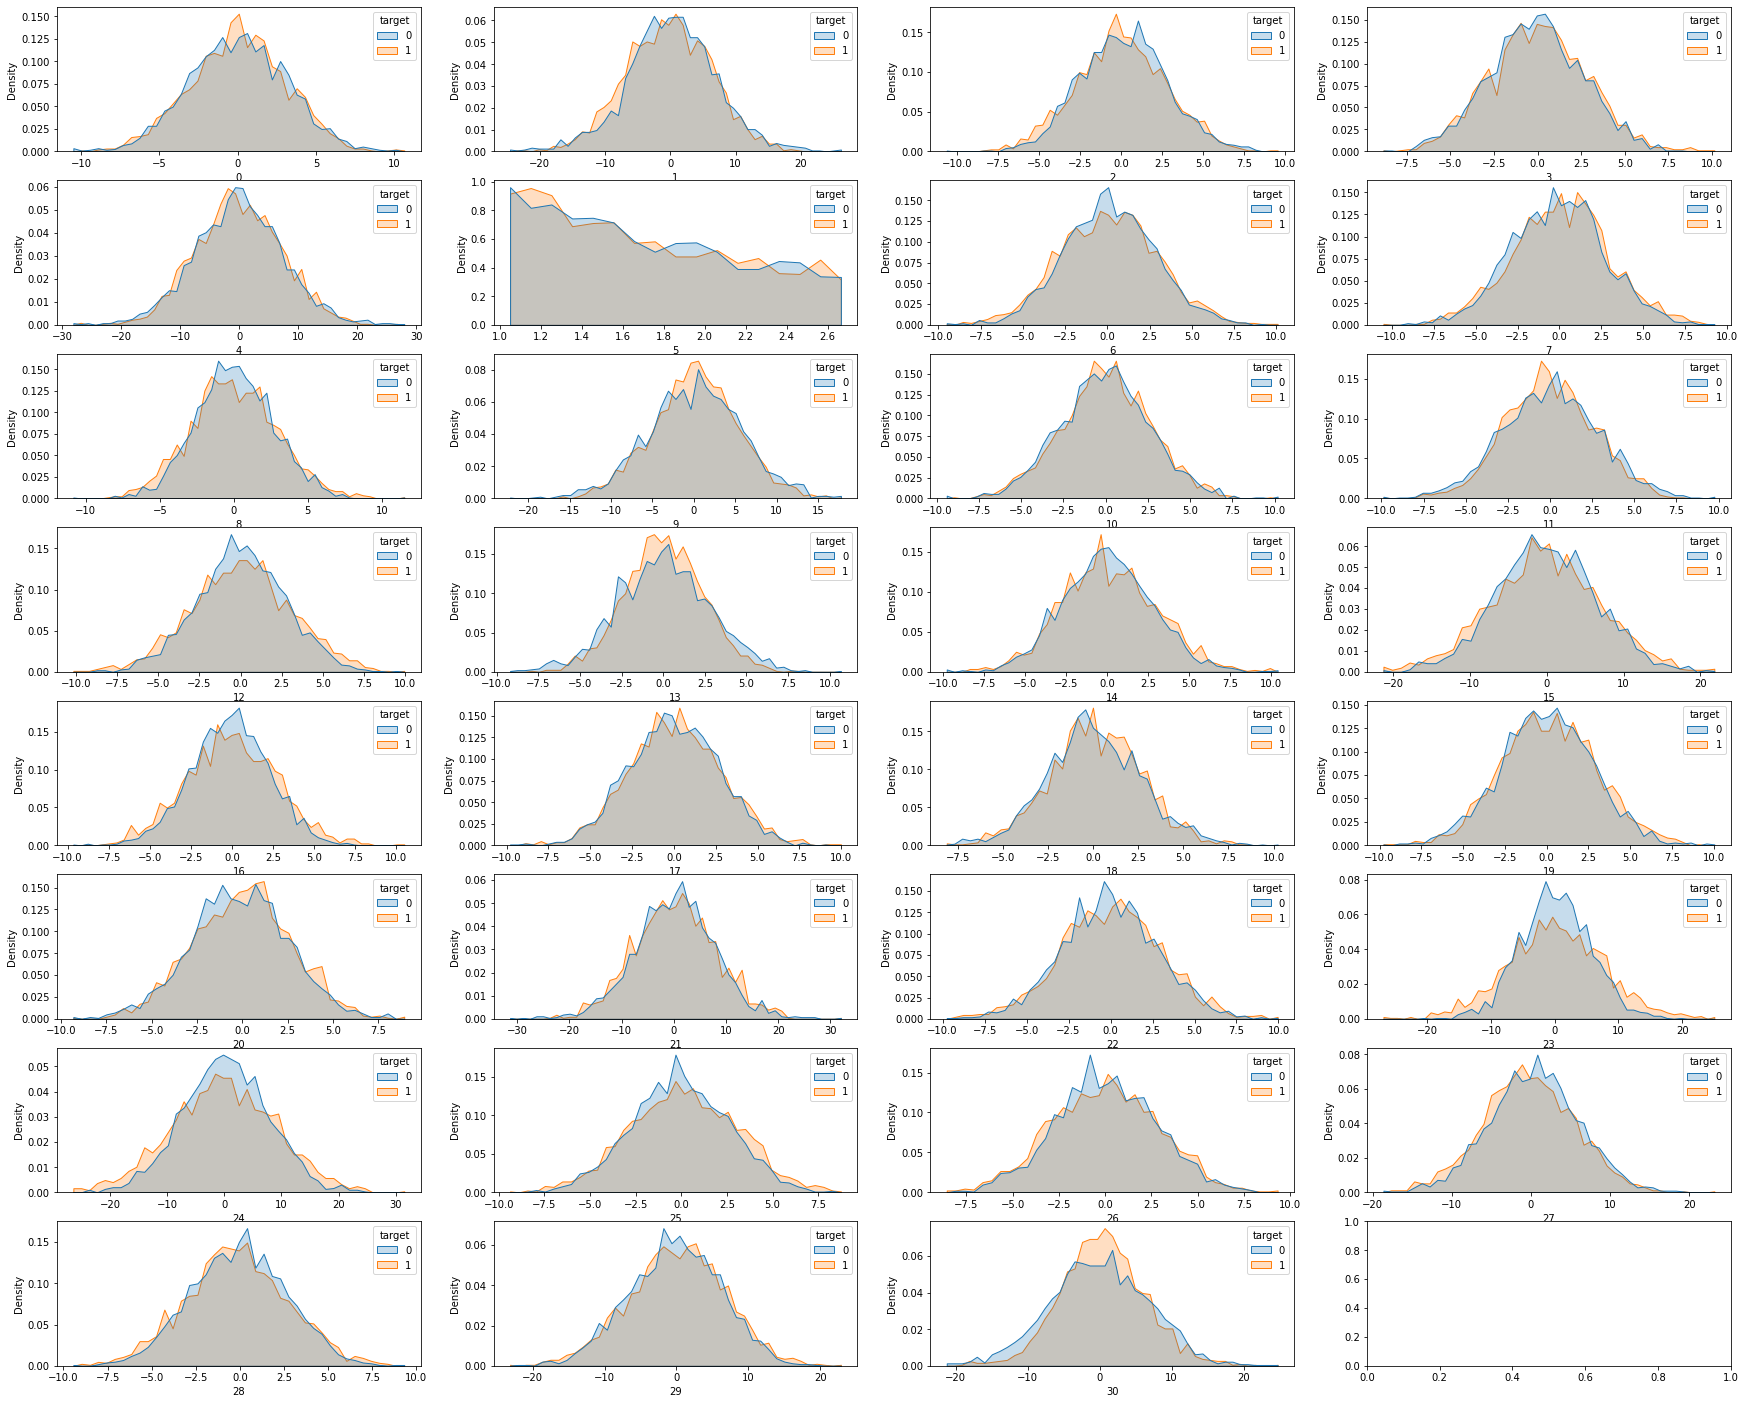

In [20]:
f, axs = plt.subplots(8, 4)
f.set_size_inches(30, 25)

for i in range(8):
    for j in range(4):
        idx = i * 4 + j
        if idx <= 30:
            sns.histplot(
                data=test,
                x=str(idx),
                ax=axs[i][j],
                label=f"{idx}",
                hue="target",
                stat="density",
                element="poly",
                multiple="layer",
                common_bins="True",
                common_norm=False,
            )

plt.show()

### Предварительная обработка данных

In [21]:
train['pred'] = np.where(train['5'] > 1.649, 1, 0)
train[['pred', 'target']].corr()

,pred,target
pred,1.0,1.0
target,1.0,1.0


In [22]:
test['pred'] = np.where(test['5'] > 1.649, 1, 0)
test[['pred', 'target']].corr()

,pred,target
pred,1.000000,-0.010058
target,-0.010058,1.000000


In [23]:
# Признак "5" полностью разделяет классы на трейне,но не как не коррелирует
# с меткой класса на тесте (полученной моделью и имеющей скор 0.9 на паблике)
del train['5'], train['pred']
del test['5'], test['pred'], test['target']

### Feature engineering

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


svc = Pipeline([
    ('SS', StandardScaler()),
    ('SVC', SVC(kernel='rbf', C=3, probability=True, random_state=42, class_weight='balanced'))
])
cluster_model = Pipeline([
    ('SS', StandardScaler()),
    ('GM', GaussianMixture(n_components=4, random_state=42, n_init=10))
])


cluster_model.fit(train.iloc[:, :-1])
proba = cluster_model.predict_proba(train.iloc[:, :-1])
X = np.hstack([train.iloc[:, :-1], proba])
y = train.iloc[:, -1]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pbar = tqdm(iter(skf.split(X, y)), leave = True, total=5) 
noises = []
for train_index, valid_index in pbar:
    svc.fit(X[train_index], y[train_index])
    pred_proba = svc.predict_proba(X[valid_index])[:, 0]
    pred = svc.predict(X[valid_index])
    mask1 = pred != y[valid_index]
    mask2 = (pred_proba > 0.7) + (pred_proba < 0.3)
    mask = mask1 & mask2
    noises += valid_index[mask].tolist()

  0%|          | 0/5 [00:00<?, ?it/s]

In [28]:
train.drop(index=noises, axis=0, inplace=True)
train_dop = pd.DataFrame(proba, columns=['31','32','33', '34'])
train_dop.drop(index=noises, axis=0, inplace=True)
train_ = pd.concat([train, train_dop], axis=1)
train_.reset_index(inplace=True, drop=True)

proba_t = cluster_model.predict_proba(test)
test_ = pd.concat([test, pd.DataFrame(proba_t, columns=['31','32','33', '34'])], axis=1)

### Multilabel Neural Network

In [34]:
import sys
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings('ignore')

In [35]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)

In [37]:
class F1_Loss(nn.Module):
    
    def __init__(self, epsilon=1e-7):
        super().__init__()
        self.epsilon = epsilon
        
    def forward(self, y_pred, y_true,):
        y_true = y_true.argmax(dim=1)
        assert y_pred.ndim == 2
        assert y_true.ndim == 1
        y_true = F.one_hot(y_true, 2).to(torch.float32)
        y_pred = F.softmax(y_pred, dim=1)
        
        tp = (y_true * y_pred).sum(dim=0).to(torch.float32)
        tn = ((1 - y_true) * (1 - y_pred)).sum(dim=0).to(torch.float32)
        fp = ((1 - y_true) * y_pred).sum(dim=0).to(torch.float32)
        fn = (y_true * (1 - y_pred)).sum(dim=0).to(torch.float32)

        precision = tp / (tp + fp + self.epsilon)
        recall = tp / (tp + fn + self.epsilon)

        f1 = 2* (precision*recall) / (precision + recall + self.epsilon)
        f1 = f1.clamp(min=self.epsilon, max=1-self.epsilon)
        return 1 - f1.mean()

f1_loss = F1_Loss().cpu()


In [38]:
class MoaDataset(Dataset):
    def __init__(self, df, targets, feats_idx, mode='train'):
        self.mode = mode
        self.feats = feats_idx
        self.data = df[:, feats_idx]
        if mode=='train':
            self.targets = targets
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        if self.mode == 'train':
            return torch.FloatTensor(self.data[idx]), torch.FloatTensor(self.targets[idx])
        elif self.mode == 'test':
            return torch.FloatTensor(self.data[idx]), 0

In [39]:
def fit_predict_fcnn(train, test, ind_for_val=None):
    if not ind_for_val:
        ind_for_val = list(train.index)

    class MoaModel(nn.Module):
        def __init__(self, num_features, num_targets=2):
            super(MoaModel, self).__init__()
            self.hidden_size = [1500, 1250, 1000, 750]
            self.dropout_value = [0.15, 0.25, 0.5, 0.6]

            self.batch_norm1 = nn.BatchNorm1d(num_features)
            self.dense1 = nn.Linear(num_features, self.hidden_size[0])

            self.batch_norm2 = nn.BatchNorm1d(self.hidden_size[0])
            self.dropout2 = nn.Dropout(self.dropout_value[0])
            self.dense2 = nn.Linear(self.hidden_size[0], self.hidden_size[1])

            self.batch_norm3 = nn.BatchNorm1d(self.hidden_size[1])
            self.dropout3 = nn.Dropout(self.dropout_value[1])
            self.dense3 = nn.Linear(self.hidden_size[1], self.hidden_size[2])

            self.batch_norm4 = nn.BatchNorm1d(self.hidden_size[2])
            self.dropout4 = nn.Dropout(self.dropout_value[2])
            self.dense4 = nn.Linear(self.hidden_size[2], self.hidden_size[3])

            self.batch_norm5 = nn.BatchNorm1d(self.hidden_size[3])
            self.dropout5 = nn.Dropout(self.dropout_value[3])
            self.dense5 = nn.utils.weight_norm(nn.Linear(self.hidden_size[3], num_targets))

        def forward(self, x):
            x = self.batch_norm1(x)
            x = F.leaky_relu(self.dense1(x))

            x = self.batch_norm2(x)
            x = self.dropout2(x)
            x = F.leaky_relu(self.dense2(x))

            x = self.batch_norm3(x)
            x = self.dropout3(x)
            x = F.leaky_relu(self.dense3(x))

            x = self.batch_norm4(x)
            x = self.dropout4(x)
            x = F.leaky_relu(self.dense4(x))

            x = self.batch_norm5(x)
            x = self.dropout5(x)
            x = self.dense5(x)
            return x

    n_splits = 5 # 8
    nstarts = 2 # 8

    nfolds = n_splits
    nepochs = 35 # 160 # 35
    batch_size = 512 # 128 # 64 # 32
    val_batch_size = batch_size * 4

    criterion = nn.BCELoss()
#     criterion = f1_loss

    kfold = MultilabelStratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    train_data = train.copy()
    test_data = test.copy()

    targets = ['t_0', 't_1']

    def prepea(data):
        data['t_0'] = np.where(data['target'] == 0, 1, 0)
        data['t_1'] = np.where(data['target'] == 1, 1, 0)

    prepea(train)

    top_feats = list(set(train.columns) - set(['target', 't_0', 't_1']))

    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(train[top_feats])
    train[top_feats] = scaler.transform(train[top_feats])
    test[top_feats] = scaler.transform(test[top_feats])

    train_targets = train[targets].values
    train = train[top_feats].values
    test = test[top_feats].values

    ntargets= train_targets.shape[1]
    top_feats = range(len(top_feats))

    for seed in range(nstarts):
        print(f'Train seed {seed}')
        set_seed(seed)

        for n, (tr, te) in enumerate(kfold.split(train_targets, train_targets)):
            print(f'Train fold {n+1}')
            xtrain, xval = train[tr], train[te]
            ytrain, yval = train_targets[tr], train_targets[te]

            train_set = MoaDataset(xtrain, ytrain, top_feats)
            val_set = MoaDataset(xval, yval, top_feats)

            dataloaders = {
                'train': DataLoader(train_set, batch_size=batch_size, shuffle=True),
                'val': DataLoader(val_set, batch_size=val_batch_size, shuffle=False)
            }
            model = MoaModel(len(top_feats)).to(device)
            checkpoint_path = f'repeat:{seed}_Fold:{n+1}.pt'
            optimizer = optim.Adam(model.parameters(), weight_decay=1e-5)
            scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, eps=1e-4, verbose=True)
            best_loss = {'train': np.inf, 'val': np.inf}

            for epoch in range(nepochs):
                epoch_loss = {'train': 0.0, 'val': 0.0}

                for phase in ['train', 'val']:
                    if phase == 'train':
                        model.train()
                    else:
                        model.eval()

                    running_loss = 0.0

                    for i, (x, y) in enumerate(dataloaders[phase]):
                        x, y = x.to(device), y.to(device)

                        optimizer.zero_grad()

                        with torch.set_grad_enabled(phase=='train'):
                            preds = model(x)
                            loss = criterion(nn.Sigmoid()(preds), y)
#                             loss = criterion(preds, y)  # if used f1_loss

                            if phase=='train':
                                loss.backward()
                                optimizer.step()

                        running_loss += loss.item() / len(dataloaders[phase])

                    epoch_loss[phase] = running_loss

                print("Epoch {}/{}   -   loss: {:5.5f}   -   val_loss: {:5.5f}".format(epoch+1, nepochs, 1-epoch_loss['train'], 1-epoch_loss['val']))

                scheduler.step(epoch_loss['val'])

                if epoch_loss['val'] < best_loss['val']:
                    best_loss = epoch_loss
                    torch.save(model.state_dict(), checkpoint_path)

    oof = np.zeros((len(ind_for_val), nstarts, ntargets))
    oof_targets = np.zeros((len(ind_for_val), ntargets))
    preds = np.zeros((len(test), ntargets))

    def mean_log_loss(y_true, y_pred):
        return 1 - f1_loss(torch.tensor(y_pred), torch.tensor(y_true))
    #     metrics = []
    #     for i, target in enumerate(targets):
    #         metrics.append(log_loss(y_true[:, i], y_pred[:, i].astype(float), labels=[0,1]))
    #     return np.mean(metrics)
    
    for seed in range(nstarts):
        print(f"Inference for seed {seed}")
        seed_targets = []
        seed_oof = []
        seed_preds = np.zeros((len(test), ntargets, nfolds))

        for n, (tr, te) in enumerate(kfold.split(train_targets, train_targets)):
            tmp = []   # <---------------------------------------
            for i in te:
                if i in range(len(ind_for_val)):
                    tmp.append(i)
            te = tmp    # <---------------------------------------
            xval, yval = train[te], train_targets[te]
            fold_preds = []

            val_set = MoaDataset(xval, yval, top_feats)
            test_set = MoaDataset(test, None, top_feats, mode='test')

            dataloaders = {
                'val': DataLoader(val_set, batch_size=val_batch_size, shuffle=False),
                'test': DataLoader(test_set, batch_size=val_batch_size, shuffle=False)
            }

            checkpoint_path = f'repeat:{seed}_Fold:{n+1}.pt'
            model = MoaModel(len(top_feats)).to(device)
            model.load_state_dict(torch.load(checkpoint_path))
            model.eval()

            for phase in ['val', 'test']:
                for i, (x, y) in enumerate(dataloaders[phase]):
                    if phase == 'val':
                        x, y = x.to(device), y.to(device)
                    elif phase == 'test':
                        x = x.to(device)

                    with torch.no_grad():
                        batch_preds = model(x)

                        if phase == 'val':
                            seed_targets.append(y)
                            seed_oof.append(batch_preds)
                        elif phase == 'test':
                            fold_preds.append(batch_preds)

            fold_preds = torch.cat(fold_preds, dim=0).cpu().numpy()
            seed_preds[:, :, n] = fold_preds

        seed_targets = torch.cat(seed_targets, dim=0).cpu().numpy()
        seed_oof = torch.cat(seed_oof, dim=0).cpu().numpy()
        seed_preds = np.mean(seed_preds, axis=2)

        print("Score for this seed {:5.5f}".format(mean_log_loss(seed_targets, seed_oof)))
        oof_targets = seed_targets
        oof[:, seed, :] = seed_oof
        preds += seed_preds / nstarts

    oof = np.mean(oof, axis=1)
    print("Overall score is {:5.5f}".format(mean_log_loss(oof_targets, oof)))
    return preds

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(train_, stratify=train_['target'], random_state=42)
X_train.shape, X_test.shape

((5154, 35), (1718, 35))

In [41]:
preds_ = fit_predict_fcnn(X_train, X_test)

Train seed 0
Train fold 1
Epoch 1/35   -   loss: 0.84373   -   val_loss: 0.95952
Epoch 2/35   -   loss: 0.98300   -   val_loss: 0.98873
Epoch 3/35   -   loss: 0.99259   -   val_loss: 0.99083
Epoch 4/35   -   loss: 0.99493   -   val_loss: 0.99136
Epoch 5/35   -   loss: 0.99576   -   val_loss: 0.99055
Epoch 6/35   -   loss: 0.99776   -   val_loss: 0.99009
Epoch 7/35   -   loss: 0.99724   -   val_loss: 0.98914
Epoch 8/35   -   loss: 0.99897   -   val_loss: 0.98901
Epoch 00008: reducing learning rate of group 0 to 1.0000e-04.
Epoch 9/35   -   loss: 0.99931   -   val_loss: 0.98911
Epoch 10/35   -   loss: 0.99863   -   val_loss: 0.98912
Epoch 11/35   -   loss: 0.99930   -   val_loss: 0.98856
Epoch 12/35   -   loss: 0.99428   -   val_loss: 0.98869
Epoch 13/35   -   loss: 0.99867   -   val_loss: 0.98822
Epoch 14/35   -   loss: 0.99560   -   val_loss: 0.98776
Epoch 15/35   -   loss: 0.99862   -   val_loss: 0.98758
Epoch 16/35   -   loss: 0.99881   -   val_loss: 0.98730
Epoch 17/35   -   loss: 0

Epoch 3/35   -   loss: 0.99457   -   val_loss: 0.98729
Epoch 4/35   -   loss: 0.99701   -   val_loss: 0.99126
Epoch 5/35   -   loss: 0.99807   -   val_loss: 0.99190
Epoch 6/35   -   loss: 0.99870   -   val_loss: 0.99255
Epoch 7/35   -   loss: 0.99827   -   val_loss: 0.99303
Epoch 8/35   -   loss: 0.99839   -   val_loss: 0.98755
Epoch 9/35   -   loss: 0.99885   -   val_loss: 0.98085
Epoch 10/35   -   loss: 0.99868   -   val_loss: 0.98055
Epoch 11/35   -   loss: 0.99940   -   val_loss: 0.98054
Epoch 00011: reducing learning rate of group 0 to 1.0000e-04.
Epoch 12/35   -   loss: 0.99923   -   val_loss: 0.97896
Epoch 13/35   -   loss: 0.98928   -   val_loss: 0.97841
Epoch 14/35   -   loss: 0.99444   -   val_loss: 0.97800
Epoch 15/35   -   loss: 0.99932   -   val_loss: 0.97646
Epoch 16/35   -   loss: 0.99877   -   val_loss: 0.97771
Epoch 17/35   -   loss: 0.99900   -   val_loss: 0.97498
Epoch 18/35   -   loss: 0.99842   -   val_loss: 0.97622
Epoch 19/35   -   loss: 0.99876   -   val_loss: 0

Epoch 5/35   -   loss: 0.98779   -   val_loss: 0.97503
Epoch 6/35   -   loss: 0.98924   -   val_loss: 0.99012
Epoch 00006: reducing learning rate of group 0 to 1.0000e-04.
Epoch 7/35   -   loss: 0.99506   -   val_loss: 0.99032
Epoch 8/35   -   loss: 0.99508   -   val_loss: 0.99121
Epoch 9/35   -   loss: 0.99495   -   val_loss: 0.99094
Epoch 10/35   -   loss: 0.99515   -   val_loss: 0.99050
Epoch 11/35   -   loss: 0.99031   -   val_loss: 0.99114
Epoch 12/35   -   loss: 0.98560   -   val_loss: 0.99036
Epoch 13/35   -   loss: 0.99598   -   val_loss: 0.99000
Epoch 14/35   -   loss: 0.99636   -   val_loss: 0.99106
Epoch 15/35   -   loss: 0.99647   -   val_loss: 0.99107
Epoch 16/35   -   loss: 0.99705   -   val_loss: 0.99194
Epoch 17/35   -   loss: 0.97751   -   val_loss: 0.99148
Epoch 18/35   -   loss: 0.99692   -   val_loss: 0.99073
Epoch 19/35   -   loss: 0.99616   -   val_loss: 0.99122
Epoch 20/35   -   loss: 0.99696   -   val_loss: 0.99100
Epoch 21/35   -   loss: 0.99738   -   val_loss:

In [42]:
res = []
for i in preds_:
    res.append(i.argmax())

In [43]:
from sklearn.metrics import f1_score

X_test['tar'] = res
f1_score(X_test.target, X_test.tar, average="macro")

0.997854683753163

In [44]:
preds_ = fit_predict_fcnn(train_, test_)

Train seed 0
Train fold 1
Epoch 1/35   -   loss: 0.86423   -   val_loss: 0.98358
Epoch 2/35   -   loss: 0.99300   -   val_loss: 0.99733
Epoch 3/35   -   loss: 0.99634   -   val_loss: 0.99598
Epoch 4/35   -   loss: 0.99776   -   val_loss: 0.99459
Epoch 5/35   -   loss: 0.99863   -   val_loss: 0.99697
Epoch 6/35   -   loss: 0.99734   -   val_loss: 0.99400
Epoch 00006: reducing learning rate of group 0 to 1.0000e-04.
Epoch 7/35   -   loss: 0.99833   -   val_loss: 0.99407
Epoch 8/35   -   loss: 0.99888   -   val_loss: 0.99478
Epoch 9/35   -   loss: 0.99890   -   val_loss: 0.99546
Epoch 10/35   -   loss: 0.99892   -   val_loss: 0.99578
Epoch 11/35   -   loss: 0.99891   -   val_loss: 0.99541
Epoch 12/35   -   loss: 0.99906   -   val_loss: 0.99581
Epoch 13/35   -   loss: 0.99916   -   val_loss: 0.99626
Epoch 14/35   -   loss: 0.99906   -   val_loss: 0.99681
Epoch 15/35   -   loss: 0.99885   -   val_loss: 0.99724
Epoch 16/35   -   loss: 0.99893   -   val_loss: 0.99764
Epoch 17/35   -   loss: 0

Epoch 3/35   -   loss: 0.99676   -   val_loss: 0.99653
Epoch 4/35   -   loss: 0.99742   -   val_loss: 0.99538
Epoch 5/35   -   loss: 0.99851   -   val_loss: 0.99486
Epoch 6/35   -   loss: 0.99880   -   val_loss: 0.99445
Epoch 7/35   -   loss: 0.99873   -   val_loss: 0.99380
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch 8/35   -   loss: 0.99921   -   val_loss: 0.99341
Epoch 9/35   -   loss: 0.99908   -   val_loss: 0.99299
Epoch 10/35   -   loss: 0.99916   -   val_loss: 0.99339
Epoch 11/35   -   loss: 0.99933   -   val_loss: 0.99355
Epoch 12/35   -   loss: 0.99921   -   val_loss: 0.99380
Epoch 13/35   -   loss: 0.99940   -   val_loss: 0.99392
Epoch 14/35   -   loss: 0.99938   -   val_loss: 0.99395
Epoch 15/35   -   loss: 0.99943   -   val_loss: 0.99386
Epoch 16/35   -   loss: 0.99944   -   val_loss: 0.99387
Epoch 17/35   -   loss: 0.99938   -   val_loss: 0.99407
Epoch 18/35   -   loss: 0.99934   -   val_loss: 0.99425
Epoch 19/35   -   loss: 0.99946   -   val_loss: 0

Epoch 5/35   -   loss: 0.99826   -   val_loss: 0.98618
Epoch 6/35   -   loss: 0.99909   -   val_loss: 0.98572
Epoch 00006: reducing learning rate of group 0 to 1.0000e-04.
Epoch 7/35   -   loss: 0.99918   -   val_loss: 0.98563
Epoch 8/35   -   loss: 0.99916   -   val_loss: 0.98541
Epoch 9/35   -   loss: 0.99906   -   val_loss: 0.98522
Epoch 10/35   -   loss: 0.99914   -   val_loss: 0.98519
Epoch 11/35   -   loss: 0.99922   -   val_loss: 0.98476
Epoch 12/35   -   loss: 0.99925   -   val_loss: 0.98472
Epoch 13/35   -   loss: 0.99913   -   val_loss: 0.98460
Epoch 14/35   -   loss: 0.99923   -   val_loss: 0.98451
Epoch 15/35   -   loss: 0.99922   -   val_loss: 0.98398
Epoch 16/35   -   loss: 0.99926   -   val_loss: 0.98392
Epoch 17/35   -   loss: 0.99924   -   val_loss: 0.98374
Epoch 18/35   -   loss: 0.99930   -   val_loss: 0.98377
Epoch 19/35   -   loss: 0.99930   -   val_loss: 0.98356
Epoch 20/35   -   loss: 0.99905   -   val_loss: 0.98355
Epoch 21/35   -   loss: 0.99932   -   val_loss:

In [45]:
res = []
for i in preds_:
    res.append(i.argmax())

### Добавим псевдо-лейблы

In [46]:
test_['target'] = res

ind_for_val = list(train_.index)
train_dop = pd.concat([train_, test_.iloc[:1000, :]])

In [47]:
preds_ = fit_predict_fcnn(train_dop, test_, ind_for_val)

Train seed 0
Train fold 1
Epoch 1/35   -   loss: 0.88968   -   val_loss: 0.98674
Epoch 2/35   -   loss: 0.99500   -   val_loss: 0.99361
Epoch 3/35   -   loss: 0.99698   -   val_loss: 0.99406
Epoch 4/35   -   loss: 0.99776   -   val_loss: 0.99293
Epoch 5/35   -   loss: 0.99870   -   val_loss: 0.99282
Epoch 6/35   -   loss: 0.99871   -   val_loss: 0.99383
Epoch 7/35   -   loss: 0.99871   -   val_loss: 0.99046
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch 8/35   -   loss: 0.99924   -   val_loss: 0.99146
Epoch 9/35   -   loss: 0.99914   -   val_loss: 0.99195
Epoch 10/35   -   loss: 0.99925   -   val_loss: 0.99276
Epoch 11/35   -   loss: 0.99945   -   val_loss: 0.99285
Epoch 12/35   -   loss: 0.99944   -   val_loss: 0.99307
Epoch 13/35   -   loss: 0.99935   -   val_loss: 0.99272
Epoch 14/35   -   loss: 0.99953   -   val_loss: 0.99262
Epoch 15/35   -   loss: 0.99953   -   val_loss: 0.99256
Epoch 16/35   -   loss: 0.99952   -   val_loss: 0.99249
Epoch 17/35   -   loss: 0

Epoch 3/35   -   loss: 0.99541   -   val_loss: 0.99771
Epoch 4/35   -   loss: 0.99677   -   val_loss: 0.99649
Epoch 5/35   -   loss: 0.99835   -   val_loss: 0.99646
Epoch 6/35   -   loss: 0.99915   -   val_loss: 0.99576
Epoch 7/35   -   loss: 0.99911   -   val_loss: 0.99540
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch 8/35   -   loss: 0.99909   -   val_loss: 0.99559
Epoch 9/35   -   loss: 0.99950   -   val_loss: 0.99531
Epoch 10/35   -   loss: 0.99933   -   val_loss: 0.99620
Epoch 11/35   -   loss: 0.99947   -   val_loss: 0.99450
Epoch 12/35   -   loss: 0.99942   -   val_loss: 0.99496
Epoch 13/35   -   loss: 0.99913   -   val_loss: 0.99594
Epoch 14/35   -   loss: 0.99940   -   val_loss: 0.99585
Epoch 15/35   -   loss: 0.99958   -   val_loss: 0.99644
Epoch 16/35   -   loss: 0.99952   -   val_loss: 0.99650
Epoch 17/35   -   loss: 0.99924   -   val_loss: 0.99593
Epoch 18/35   -   loss: 0.99948   -   val_loss: 0.99640
Epoch 19/35   -   loss: 0.99924   -   val_loss: 0

Epoch 5/35   -   loss: 0.99864   -   val_loss: 0.99227
Epoch 6/35   -   loss: 0.99910   -   val_loss: 0.99270
Epoch 7/35   -   loss: 0.99940   -   val_loss: 0.99292
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch 8/35   -   loss: 0.99945   -   val_loss: 0.99261
Epoch 9/35   -   loss: 0.99945   -   val_loss: 0.99281
Epoch 10/35   -   loss: 0.99950   -   val_loss: 0.99295
Epoch 11/35   -   loss: 0.99945   -   val_loss: 0.99271
Epoch 12/35   -   loss: 0.99948   -   val_loss: 0.99192
Epoch 13/35   -   loss: 0.99904   -   val_loss: 0.99202
Epoch 14/35   -   loss: 0.99949   -   val_loss: 0.99065
Epoch 15/35   -   loss: 0.99949   -   val_loss: 0.99053
Epoch 16/35   -   loss: 0.99941   -   val_loss: 0.99081
Epoch 17/35   -   loss: 0.99949   -   val_loss: 0.99028
Epoch 18/35   -   loss: 0.99933   -   val_loss: 0.99033
Epoch 19/35   -   loss: 0.99954   -   val_loss: 0.99008
Epoch 20/35   -   loss: 0.99938   -   val_loss: 0.99037
Epoch 21/35   -   loss: 0.99947   -   val_loss:

In [48]:
res = []
for i in preds_:
    res.append(i.argmax())

In [49]:
sub = pd.read_csv('../input/sample_submission_ex.csv')
sub.target = res
sub.to_csv('submission_lexa.csv', index=False)
sub.target.value_counts()

0    2021
1    1899
Name: target, dtype: int64

on the base of decision https://www.kaggle.com/code/alexcei/fin-made-2022-ml-competition-task-1/notebook